# DeepLearning the Fashion-MNIST
## Robert Kurtz / July 2023
- My first Use Case of Neuro Networks
- Training the model 
- playing around with the features and seeing the effects of each parameter
- getting a good accuracy score for the prediction
- comparing with the udemy solution

In [71]:
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns

## 01. Loading the Data

The are two ways of importing the data which is already split. Either with Numpy or with Tensorflow. For practise purposes I will do both and # hashtag the other one so I can refer to both in case i wanted to.

- The Training data consists of 60k images
- The Test data of 10 images 
- We also load their corresponding labels

### Tensorflow Import

In [72]:
#Loading via Tensorflow

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# x_train and x_test are NumPy arrays containing the grayscale image data
# y_train and y_test are NumPy arrays containing the corresponding labels

In [73]:
print(x_train.shape)  # Output: (60000, 28, 28)
print(x_test.shape)   # Output: (10000, 28, 28)

(60000, 28, 28)
(10000, 28, 28)


### Alternative: Numpy Import

- Here we do the split of naming x_test etc. manually...
- With Tensorflow it was already integrated

In [74]:
#Loading via NumPy (funktioniert aktuell nicht)
#import gzip

#x_train = np.loadtxt('data/fashion/train-images-idx3-ubyte.gz', dtype=np.uint8)
#y_train = np.loadtxt('data/fashion/train-labels-idx1-ubyte.gz', dtype=np.uint8)
#x_test = np.loadtxt('data/fashion/t10k-images-idx3-ubyte.gz', dtype=np.uint8)
#y_test = np.loadtxt('data/fashion/train-labels-idx1-ubyte.gz', dtype=np.uint8)



## Looking at the images...

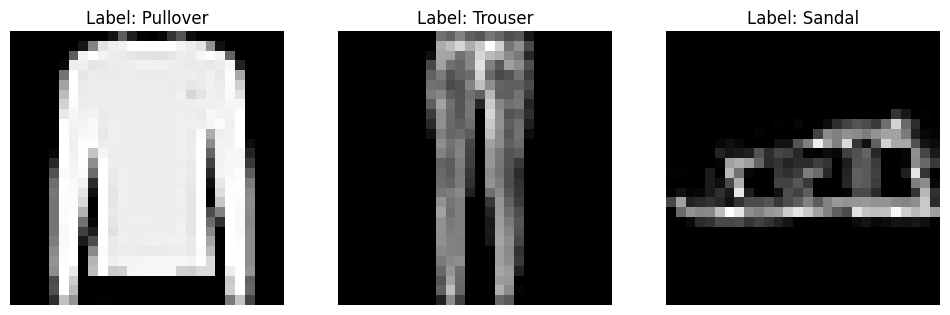

In [75]:
import matplotlib.pyplot as plt

# You can visualize a random sample of images from the training dataset

# Defining a dictionary to map class labels to their names
label_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Choose the number of images you want to visualize
num_images_to_visualize = 3

# Generate random indices to select random images from the training dataset

import random
random_indices = random.sample(range(len(x_train)), num_images_to_visualize)

# Plot the images
plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indices):
    plt.subplot(1, num_images_to_visualize, i+1)
    plt.imshow(x_train[index], cmap='gray')
    plt.title(f"Label: {label_names[y_train[index]]}")
    plt.axis('off')
plt.show()

## 02. Reshaping and normalizing the data

1. **Reshaping**:

In deep learning, convolutional neural networks (CNNs) expect input data to be in a specific format. For image data, especially when working with TensorFlow or Keras, the data should be represented as a 4-dimensional array (tensor) with the following dimensions:

- Number of samples (batch size): This represents the number of images in your dataset. In the case of the Fashion-MNIST training set, there are 60,000 images, and in the test set, there are 10,000 images.
- Image height: This represents the height (number of rows) of each image. For Fashion-MNIST, the images are 28 pixels in height.
- Image width: This represents the width (number of columns) of each image. For Fashion-MNIST, the images are 28 pixels in width.
- Number of channels: For grayscale images, the number of channels is 1, as there is only one intensity value (gray level) per pixel. For RGB color images, the number of channels would be 3 (for red, green, and blue).
The original Fashion-MNIST dataset consists of 60,000 images with a shape of (28, 28) each. To convert the data into the expected 4-dimensional format, we use the reshape() function to add the channel dimension. The code x_train.reshape((-1, 28, 28, 1)) reshapes the x_train array from shape (60000, 28, 28) to shape (60000, 28, 28, 1).

2. **Normalizing**:

Neural networks tend to perform better when the input data is scaled or normalized to a similar range. For image data, the pixel values are usually represented as integers ranging from 0 to 255, where 0 corresponds to black and 255 corresponds to white (for grayscale images). Normalizing the data involves scaling the pixel values to a range between 0 and 1.

Dividing each pixel value by 255 achieves this normalization, as dividing any value in the range [0, 255] by 255 will result in a value between 0 and 1. This process ensures that the pixel values become floating-point numbers between 0 and 1, which helps the neural network to learn more effectively during training.

After normalization, the pixel values will be between 0 and 1, where 0 represents black, 1 represents white, and values in between represent different shades of gray.

In [76]:
# Assuming x_train and x_test have the shape (60000, 28, 28) and (10000, 28, 28), respectively
#reshaping & normalizing images
x_train = x_train.reshape((-1, 28, 28, 1))/ 255
x_test = x_test.reshape((-1, 28, 28, 1))/ 255

In [77]:
#to check if all is correct
x_train.shape

(60000, 28, 28, 1)

## 03. Encoding of the labels

One-hot encoding is a process used to convert categorical data into a format that can be better understood and processed by machine learning algorithms, especially in the context of classification tasks. In the case of the Fashion-MNIST dataset, the one-hot encoding is applied to the class labels, which represent the categories of clothing items (0 to 9).

Here's a quick explanation of one-hot encoding:

Step 1: Original Class Labels

In the original Fashion-MNIST dataset, the class labels range from 0 to 9, representing the following categories:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

Step 2: One-Hot Encoding

One-hot encoding converts each class label into a binary vector where all elements are 0 except for one element, which is set to 1. The position of the 1 in the vector corresponds to the original class label. For example:

Class label 0 (T-shirt/top) is encoded as [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Class label 1 (Trouser) is encoded as [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Class label 2 (Pullover) is encoded as [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
... and so on.

This encoding allows the machine learning model to understand the class labels as distinct categories without implying any numerical order. For example, a Trouser (class 1) is not "greater" or "less" than a T-shirt (class 0) in a meaningful way; they are simply different categories.

Step 3: Usage in Classification Tasks

One-hot encoding is particularly useful for classification tasks where the output is categorical and not ordinal (no inherent order among classes). When training a neural network for multi-class classification, you typically use one-hot encoded vectors as the target labels. The network's output will be a probability distribution over the classes, and the one-hot encoded labels serve as target probabilities for each class.

In Python with TensorFlow/Keras, you can easily perform one-hot encoding using tf.keras.utils.to_categorical() function

In [78]:
# One-Hot Encoding of labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

## 04. Building the Model Architecture

In step 4, we define the model architecture, which specifies the structure and design of the neural network. For Fashion-MNIST, a simple Convolutional Neural Network (CNN) architecture is commonly used. A CNN is particularly well-suited for image recognition tasks due to its ability to automatically learn hierarchical features from the input images.

The basic architecture of the CNN for Fashion-MNIST typically consists of the following layers:

1. Input Layer:

This layer defines the input shape of the images that the model will process. For Fashion-MNIST, the images are 28x28 grayscale images, so the input shape is (28, 28, 1).

2. Convolutional Layers:

Convolutional layers apply filters (also known as kernels) to the input image to extract features. These filters move across the image and perform element-wise multiplication and summation to generate feature maps.
Each convolutional layer is followed by an activation function, such as ReLU (Rectified Linear Unit), to introduce non-linearity into the network.
The number of filters and the size of the filters (kernel size) are important hyperparameters that you can adjust based on the complexity of the data and the desired performance.

3. Pooling Layers:

Pooling layers reduce the spatial dimensions of the feature maps, reducing computational complexity and making the model more robust to spatial variations in the input.
Common pooling operations are MaxPooling, which takes the maximum value within a region, and AveragePooling, which takes the average value within a region.

4. Flatten Layer:

After several convolutional and pooling layers, the model needs to flatten the 2D feature maps into a 1D vector to connect to the fully connected layers.

5. Fully Connected (Dense) Layers:

Fully connected layers take the flattened feature vector as input and process it with weights and biases.
These layers combine high-level features extracted by the convolutional layers to make predictions.
The last dense layer typically has a softmax activation function, which converts the final layer's output into a probability distribution over the classes.

6. Output Layer:

The output layer represents the final predictions of the model.
For Fashion-MNIST, the output layer has 10 neurons, corresponding to the 10 classes (clothing categories).
The softmax activation function is used to convert the final layer's outputs into probabilities for each class, indicating the likelihood of each image belonging to each category.
The specific architecture details, such as the number of convolutional layers, the number of filters, the number of neurons in the fully connected layers, and other hyperparameters, can be adjusted based on the complexity of the problem and available computational resources.

In [79]:
from tensorflow import keras

# Step 2: Model Architecture
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), 
    #This line defines the first convolutional layer with 32 filters (also known as channels or feature maps).
    #Each filter has a size of 3x3 pixels.
    #The activation function used in this layer is ReLU (Rectified Linear Unit), which introduces non-linearity into the model to learn complex patterns.
    #The input_shape=(28, 28, 1) specifies the shape of the input images, which are 28x28 grayscale images with a single channel.
    keras.layers.MaxPooling2D((2, 2)),
    #This line defines the first max-pooling layer.
    #Max-pooling reduces the spatial dimensions of the feature maps by taking the maximum value within a 2x2 region.
    #It helps in reducing the computational complexity and providing translation invariance to the model.
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    #This line defines the second convolutional layer with 64 filters. It also has the filters at 3x3 and the activation function is ReLu.
    keras.layers.MaxPooling2D((2, 2)), #This line defines the second max-pooling layer.
    keras.layers.Flatten(), #This line introduces the Flatten layer.
    #After the convolutional and pooling layers, the feature maps need to be flattened into a 1D vector to connect to the fully connected layers.
    keras.layers.Dense(128, activation='relu'), #This line defines the first fully connected layer (dense layer) with 128 neurons.
    #The activation function used here is ReLU.
    keras.layers.Dense(10, activation='softmax')  #This line defines the output layer with 10 neurons, corresponding to the 10 classes in the Fashion-MNIST dataset.
    #The activation function used here is softmax, which converts the raw output scores into probabilities.
    #The output of this layer represents the probability distribution over the 10 classes, indicating the likelihood of each image belonging to each category.
])


### Discussing the choices of numbers (e.g., filter sizes, number of filters, number of neurons) in the architecture:

1. The number of filters in the convolutional layers (32 and 64) is chosen based on a balance between model complexity and available computational resources. Increasing the number of filters allows the model to learn more complex features, but it also increases the number of model parameters and computational cost.

2. The filter size (3x3) is a common choice for convolutional layers and has been found to be effective in capturing local patterns in images.

3. The choice of max-pooling layers with a pooling size of (2, 2) reduces the spatial dimensions of the feature maps by half, effectively downsampling the data.

4. The number of neurons in the fully connected layer (128) is another hyperparameter that can be adjusted based on the complexity of the problem and the size of the dataset.

5. The output layer has 10 neurons to match the number of classes in Fashion-MNIST. The softmax activation function provides a probability distribution over the classes, allowing the model to make predictions for each category.

## 05. Compiling the Model

Step 5 involves compiling the model, which is a crucial step before training the neural network. Compiling the model means specifying additional settings that define how the model will be trained, such as the optimizer, the loss function, and any additional metrics to monitor during training.

In [80]:
#RMSprop optimizer --> It makes sense to try out various e.g. the "adam" and see which works better

optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9) 
#learning_rate parameter controls the step size at each iteration, and the rho parameter is the decay rate for the moving average of squared gradients

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Optimizer:**
The optimizer is a crucial component of training neural networks. It determines how the model's weights are updated during training to minimize the loss function.
'RMSprop' is one of the popular optimizers used in deep learning. It stands for "Root Mean Square Propagation" and is well-suited for recurrent neural networks (RNNs) and certain non-stationary problems.
RMSprop adapts the learning rate for each parameter by using a moving average of squared gradients. This helps in efficient training and better convergence on certain types of tasks.

**Loss Function:**
The loss function is a measure of how well the model's predictions match the true target labels during training.
For multi-class classification tasks like Fashion-MNIST, where we are predicting one out of several classes, 'categorical_crossentropy' is a commonly used loss function.
Categorical cross-entropy measures the dissimilarity between the true one-hot encoded labels and the predicted probabilities for each class. The goal of training is to minimize this loss, effectively improving the model's ability to correctly classify the images.

**Metrics:**
Metrics are used to monitor the model's performance during training, but they do not affect the model's weights' optimization.
In this case, we are using ['accuracy'] as the metric, which means we want to track the accuracy of the model on the training and validation datasets during training.
Accuracy is a common metric for classification tasks and represents the proportion of correct predictions compared to the total number of samples in the dataset.

## 06. Model Training

- Using Back Progagation and the specified optimizer

After the compiling, the model is now ready for training. During the training process, the model will iteratively adjust its weights using backpropagation and the specified optimizer, with the goal of minimizing the loss function and improving accuracy.

+++

Model training is the process of fitting the neural network to the training data, allowing it to learn from the input-output pairs and adjust its weights to make accurate predictions on new, unseen data. The key components of model training are the following:

### Explaining the components:

1. **Epochs:**

    - One epoch corresponds to one iteration over the entire training dataset.
    - During training, the model processes the entire dataset in batches and updates its weights after each epoch.
    - The number of epochs is a hyperparameter that determines how many times the model will see the entire dataset. Too few epochs may result in underfitting (insufficient learning), while too many epochs may lead to overfitting (memorizing the training data without generalizing well to new data).

2. **Batch Size:**

    - The batch size represents the number of samples that the model processes together before updating its weights.
    - A smaller batch size (e.g., 32) means the model updates its weights more frequently but with higher variance in the weight updates.
    - A larger batch size (e.g., 128) means fewer weight updates but with lower variance.
    - The batch size can affect the training time, memory usage, and convergence behavior of the model.

3. **Validation Split:**

    - During training, it's common to split the training dataset into training and validation sets to monitor the model's performance on data it has not seen before.
    - The validation split is the fraction of the training data used for validation. For example, with a validation split of 0.2, 20% of the training data is used for validation, and the remaining 80% is used for training.
    - The validation set helps in identifying potential overfitting or underfitting and allows for early stopping to prevent unnecessary training if the model's performance on the validation set plateaus or starts degrading.

In [81]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.20)

# epochs=10: 
# In this example, the model is trained for 10 epochs. 
# This is a relatively small number of epochs, and in practice, you may experiment with higher values to achieve better convergence and performance.

# batch_size=32: 
# The model processes 32 samples together before updating the weights. 
# The choice of batch size can depend on the available memory and computational resources. Smaller batch sizes may lead to more frequent weight updates and can help with generalization, but they might also require more training time.

# validation_split=0.20: 
# Here, 20% of the training data is used as a validation set to monitor the model's performance during training. 
# This means that the remaining 80% is used for actual training. A validation split of 0.20 is a common practice, but you can adjust this value based on the size of your dataset and the level of confidence you need in the validation performance.

Epoch 1/10
1407/1407 [==============================] - 21s 15ms/step - loss: 0.4866 - accuracy: 0.8206 - val_loss: 0.3894 - val_accuracy: 0.8570
Epoch 2/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.3178 - accuracy: 0.8847 - val_loss: 0.3527 - val_accuracy: 0.8752
Epoch 3/10
1407/1407 [==============================] - 41s 29ms/step - loss: 0.2734 - accuracy: 0.9015 - val_loss: 0.3025 - val_accuracy: 0.8892
Epoch 4/10
1407/1407 [==============================] - 25s 18ms/step - loss: 0.2412 - accuracy: 0.9123 - val_loss: 0.2985 - val_accuracy: 0.8939
Epoch 5/10
1407/1407 [==============================] - 23s 16ms/step - loss: 0.2214 - accuracy: 0.9194 - val_loss: 0.2835 - val_accuracy: 0.8999
Epoch 6/10
1407/1407 [==============================] - 22s 16ms/step - loss: 0.2006 - accuracy: 0.9274 - val_loss: 0.2669 - val_accuracy: 0.9094
Epoch 7/10
1407/1407 [==============================] - 24s 17ms/step - loss: 0.1839 - accuracy: 0.9336 - val_loss: 0.3169 -

*The training loss* measures how well the model is fitting the training data, and the *training accuracy* represents the proportion of correct predictions on the training dataset.

The *validation loss* measures how well the model is generalizing to new, unseen data, and the *validation accuracy* represents the proportion of correct predictions on the validation dataset.

### Interpreting the results:

The training loss is significantly lower (0.1488) than the validation loss (0.2842), which is a good sign. It suggests that the model is fitting the training data well, and it's not overfitting to the training data.

The training accuracy (94.60%) is higher than the validation accuracy (90.94%). This difference is normal, as the model may slightly overfit to the training data. However, the gap between training and validation accuracy is not excessive, indicating good generalization.

The validation accuracy of approximately 90.94% is quite good for the Fashion-MNIST dataset, which consists of grayscale images of clothing items. This result suggests that your model is performing well on unseen data.

## 07. Visualizing the training history

Visualizing the training history allows you to gain insights into how your model is performing during the training process. In Python with TensorFlow/Keras, you can easily plot the training and validation metrics stored in the history object, which is returned by the fit() method after training the model.

The history object contains training metrics, such as the loss and accuracy, for each epoch. To visualize the training progress, you can use matplotlib or any other plotting library of your choice. Here's an example of how to visualize the training and validation accuracy and loss using matplotlib:

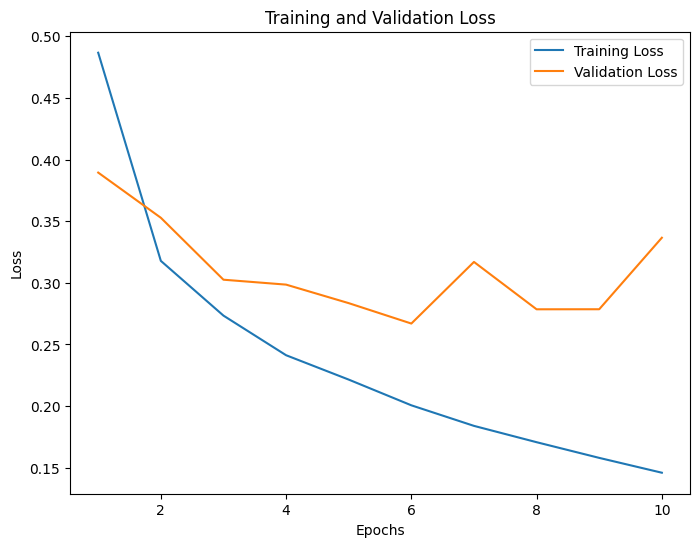

In [82]:
import matplotlib.pyplot as plt

# Assuming you have already trained the model and have the history object
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Accessing training and validation metrics from history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plotting the training and validation loss
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

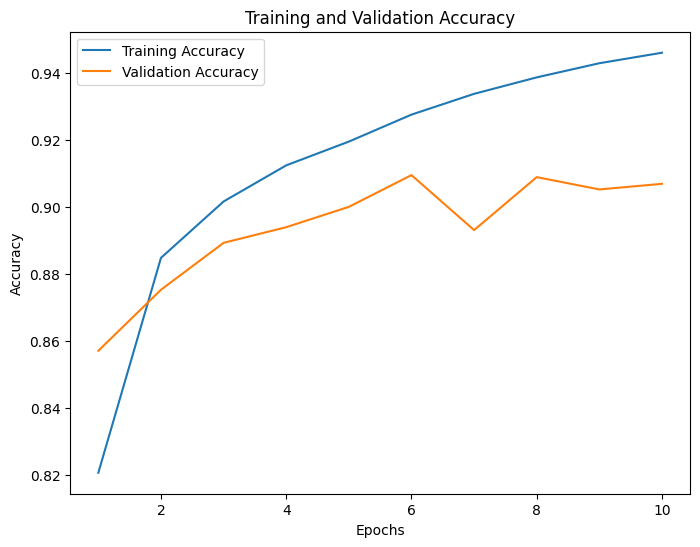

In [83]:
# Plotting the training and validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

## 08. Model evaluation on the test data

Evaluating the model on the test data is an important step to assess its performance on unseen data and understand how well it will generalize to real-world scenarios.


In [84]:
#using the evaluate() method

test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.3678 - accuracy: 0.9005
Test Loss: 0.367801696062088
Test Accuracy: 0.9004999995231628


### Explanation:

test_loss, test_accuracy = model.evaluate(x_test, y_test): 
The evaluate() method is used to evaluate the trained model on the test dataset. It takes the test input data (x_test) and the corresponding true labels (y_test) as input. The method returns the test loss and test accuracy.

test_loss: 
The test loss represents how well the model performs on the test dataset. It is a measure of the discrepancy between the true test labels and the predicted probabilities. Lower test loss indicates better model performance on the test data.

test_accuracy: 
The test accuracy represents the proportion of correct predictions made by the model on the test dataset. It gives an indication of how well the model generalizes to new, unseen data.

Keep in mind that the test accuracy should be similar to the validation accuracy obtained during training, indicating that the model is generalizing well. If the test accuracy is significantly lower than the validation accuracy, it may indicate overfitting during training.


## 09. Saving & Loading the DEEP LEARNING MODEL

- To save a trained model in TensorFlow/Keras, you can use the save() method as follows:

### Saving:

In [85]:
# Saving the model to a file
model.save('/Users/robertkurtz/Desktop/DataScience/fashion-mnist/benchmark/models')

INFO:tensorflow:Assets written to: /Users/robertkurtz/Desktop/DataScience/fashion-mnist/benchmark/models/assets


INFO:tensorflow:Assets written to: /Users/robertkurtz/Desktop/DataScience/fashion-mnist/benchmark/models/assets


#### model.save('path_to_save_model'): 
The save() method is used to save the entire trained model to a specified file or directory. You need to provide the path where you want to save the model.

- *If you specify a directory path (e.g., 'models/'), TensorFlow/Keras will create a directory with that name and save the model files within it.*
- *If you specify a file path with a specific extension (e.g., 'model.h5'), TensorFlow/Keras will save the entire model to that file.*

When you use the model.save() method, TensorFlow/Keras saves the model architecture, model configuration, model weights, optimizer state, and any additional information related to the model's training. This way, you can load the model back at a later time and continue training or use it for making predictions on new data.

### Loading:


In [86]:
from tensorflow.keras.models import load_model

# Load the model from the saved file
loaded_model = load_model('/Users/robertkurtz/Desktop/DataScience/fashion-mnist/benchmark/models')

After loading the model, you can use it for prediction or continue training if needed. It's important to note that you should have the same version of TensorFlow/Keras installed to ensure compatibility between saving and loading the model.

In summary, saving a trained deep learning model in TensorFlow/Keras is similar to saving a machine learning model using pickle, but TensorFlow/Keras's save() method preserves additional information required for deep learning models, such as the architecture and optimizer state.

## 10. (Theoretically) making predictions

Once I am satisfied with the model's performance on the test data, I can use it for making predictions on new, unseen data in my application or use case.

In [87]:
# Currently we don't have any new data...!!!!!

# Using the `predict()` method to make predictions on new data

# --> predictions = model.predict(x_new_data)

# The `predictions` variable now contains the predicted probabilities for each class
# You can use `np.argmax()` to get the predicted class labels

# --> predicted_labels = np.argmax(predictions, axis=1)

# The `predicted_labels` variable contains the predicted class labels for the new data
# These labels correspond to the class with the highest probability for each sample in the new data


### Explanation:

- model.predict(x_new_data): The predict() method is used to make predictions on new data (x_new_data) using your trained model. The method takes the new data as input and returns the predicted probabilities for each class.

- predictions: The predictions variable holds the predicted probabilities for each sample in the new data. Each row of predictions represents the predicted probabilities for a single sample, and each column corresponds to a class label.

- np.argmax(predictions, axis=1): To obtain the predicted class labels, we use np.argmax() function along axis=1. This function returns the indices of the maximum values along the specified axis, which corresponds to the predicted class label for each sample.

- predicted_labels: The predicted_labels variable contains the predicted class labels for the new data. These labels represent the class with the highest probability for each sample in the new data.

- After executing this code, the predicted_labels variable will contain the predicted class labels for your new, unseen data. You can use these predicted labels for various applications, such as classification tasks or generating insights based on your model's predictions.

- Remember to preprocess the new data in the same way as the training and test data to ensure that the input data is in the correct format (e.g., reshaped and normalized) before making predictions. This ensures that the data is compatible with the input requirements of your trained model.

- By following these steps, you can effectively use your trained model to make predictions on real-world data and apply the knowledge gained from your deep learning model to various practical applications

# FINALE